In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_dataset['MEDV'] = boston.target
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
boston_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
y = boston_dataset['MEDV']
X =boston_dataset.drop(columns = ['MEDV'])

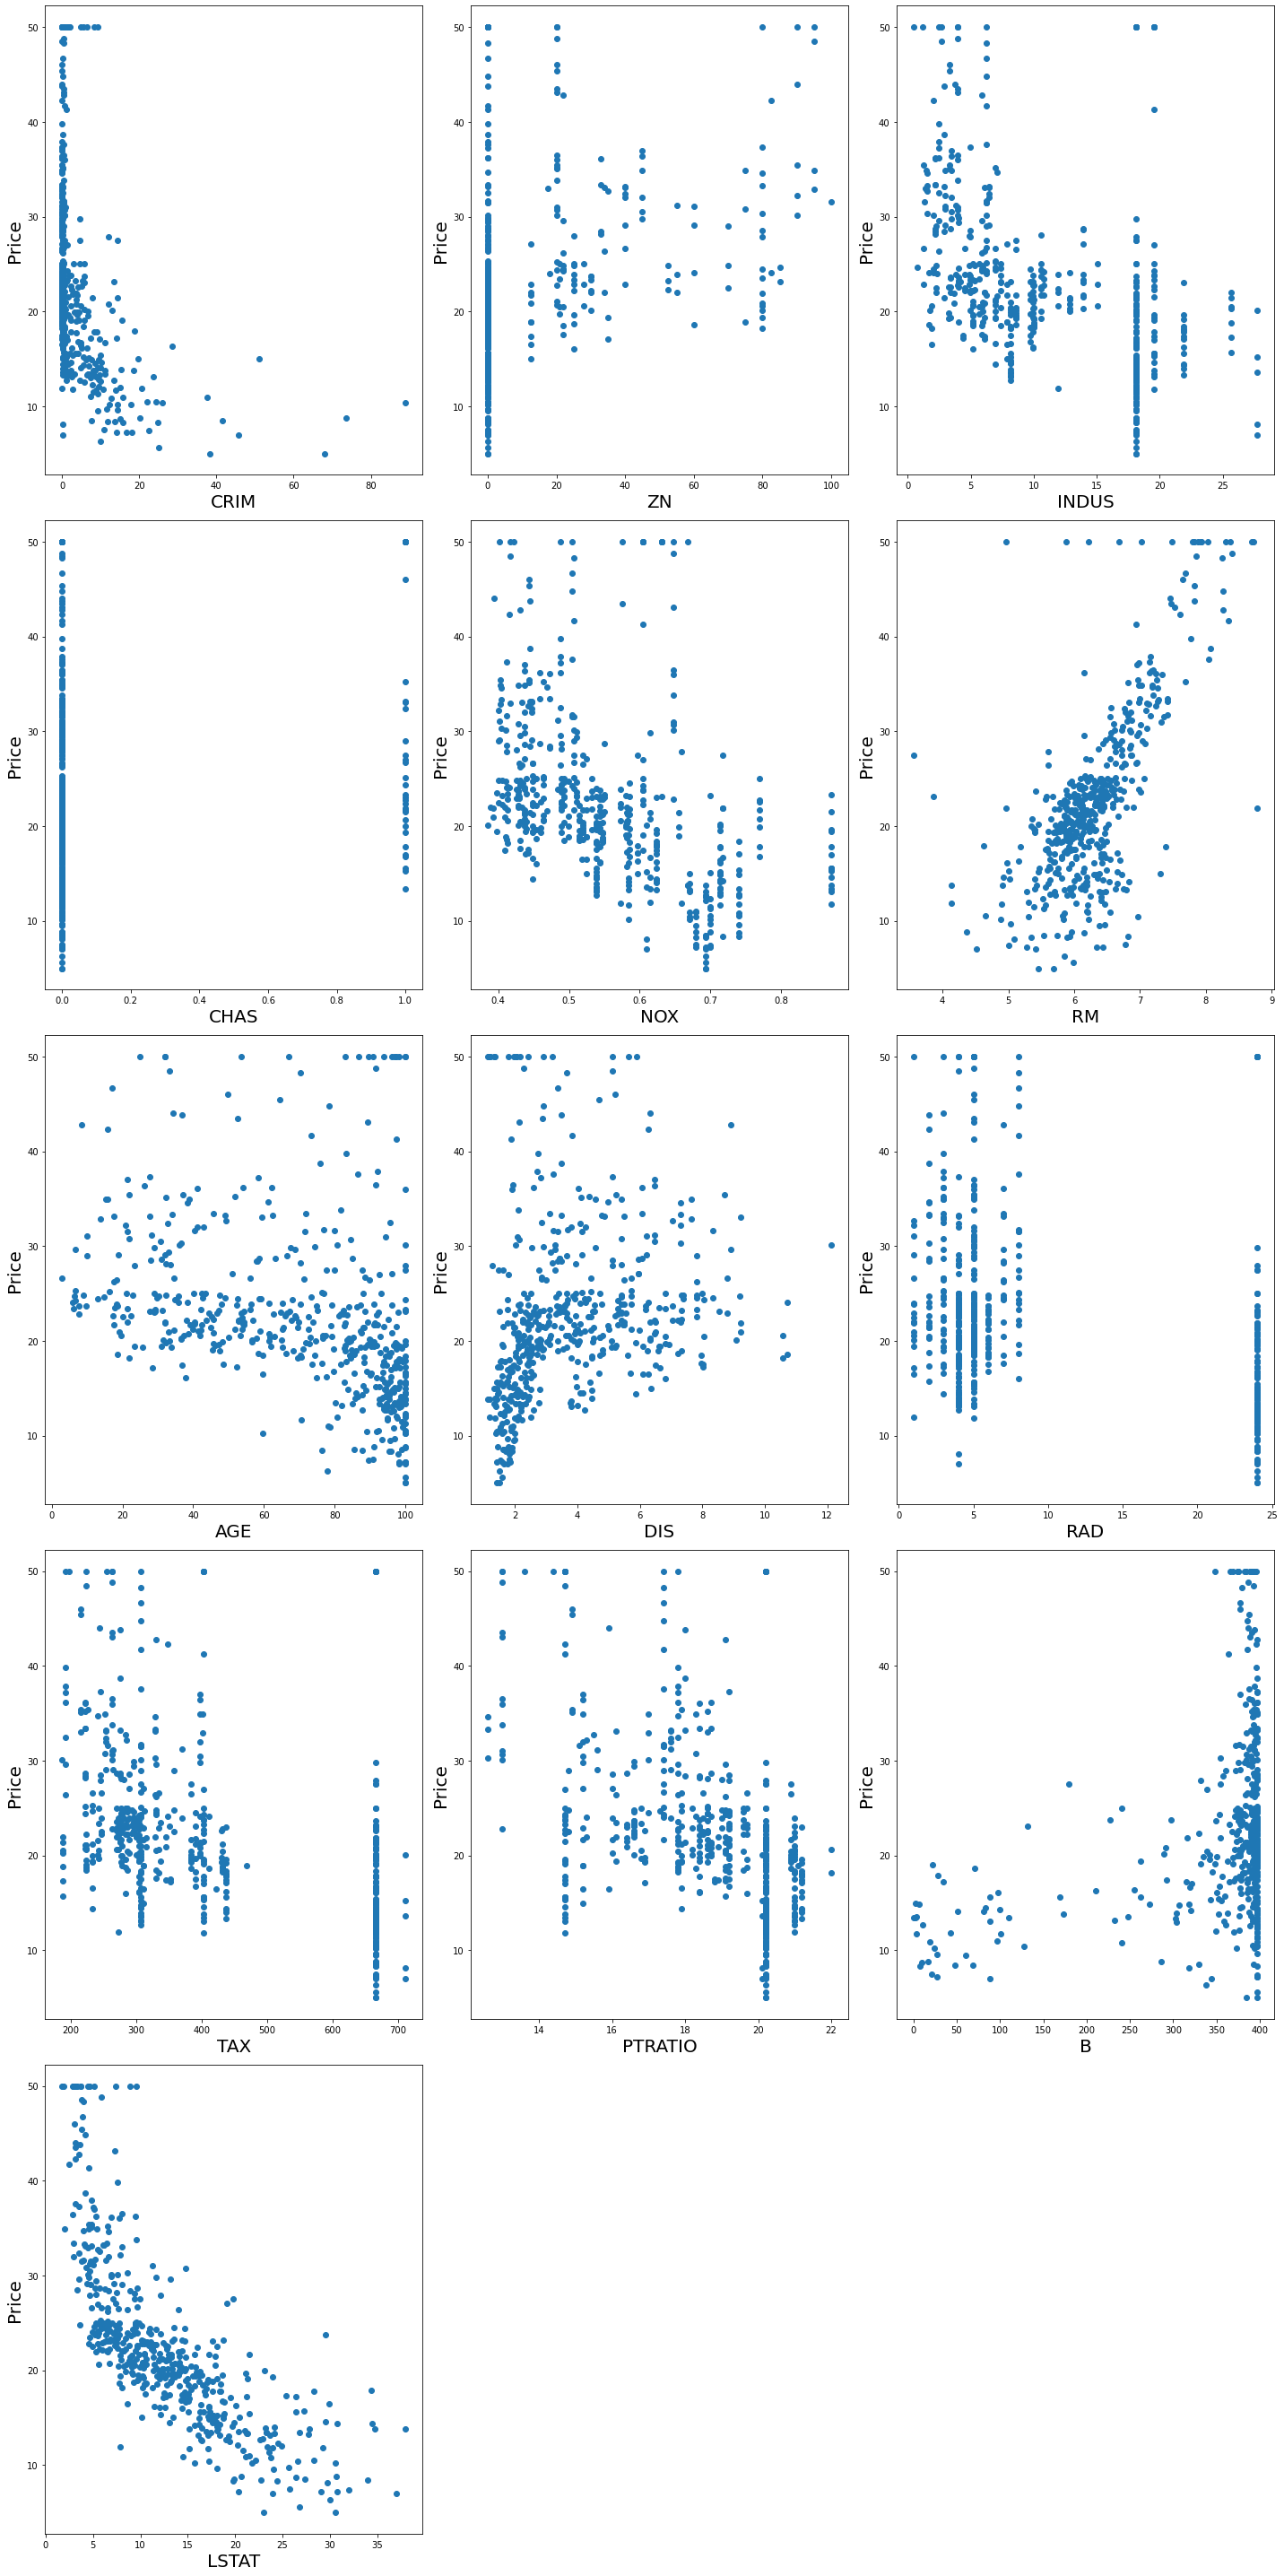

In [7]:
import seaborn as sns
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [12]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [13]:
X_new =boston_dataset.drop(columns = ['RAD','TAX','MEDV'])  # Since RAD and TAX are having value more than 5.
X_new_scaled = scaler.fit_transform(X_new)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_new_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X_new.columns
vif

,VIF,Features
0,1.478206,CRIM
1,2.154483,ZN
2,3.179166,INDUS
3,1.057805,CHAS
4,3.901348,NOX
5,1.872532,RM
6,3.075755,AGE
7,3.954443,DIS
8,1.496077,PTRATIO
9,1.316559,B


In [15]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
x_train,x_test,y_train,y_test = train_test_split(X_new_scaled,y,test_size = 0.25,random_state=0)

In [16]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [17]:
regression.score(x_train,y_train)

0.7628198353781434

In [18]:
regression.score(x_test,y_test)

0.6124470685581005

In [19]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [20]:
adj_r2(x_train,y_train)

0.755710893114273

In [21]:
adj_r2(x_test,y_test)

0.5753767881593101

In [35]:
# Lasso Regularization to check overfitting with the selected features
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [36]:
alpha = lasscv.alpha_
alpha

0.00035864065460896965

In [37]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00035864065460896965)

In [38]:
lasso_reg.score(x_test, y_test)

0.6124501173702684

There is slight improvement in the test result but still not satisfactory result.

In [39]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([4.26470236, 3.54420287, 5.73552306, 5.97848828, 0.31014884,
       9.79976789, 2.28926556, 7.00699545, 2.67884638, 2.78565625,
       9.20095063, 1.94558651, 5.83253262, 6.31211608, 6.20776765,
       3.66799773, 2.32617015, 0.92428034, 9.94094252, 8.58411153,
       9.25869363, 4.23954862, 1.51315321, 3.20069994, 2.95399134,
       8.40563708, 6.01947359, 2.28251212, 7.83462316, 6.62411652,
       5.41991924, 5.62503957, 0.56810462, 9.4335167 , 0.46507811,
       1.90934114, 8.00645747, 2.58043563, 0.26950079, 3.81985547,
       7.74121862, 8.22729279, 1.44614551, 0.72050188, 4.40472496,
       2.11239228, 9.45092781, 9.61402279, 7.25159488, 2.00486712]),
        cv=10, normalize=True)

In [40]:
ridgecv.alpha_

0.26950079385680503

In [41]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.26950079385680503)

In [42]:
ridge_model.score(x_test, y_test)

0.6123748426665347

In [43]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [44]:
elasticCV.alpha_

0.053010081485967905

In [45]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.053010081485967905)

In [46]:
elasticnet_reg.score(x_test, y_test)

0.6092864606836705

All the regularizations giving almost similar result. Now we will go through each of the features separately to check whether they yield better accuracy or not.

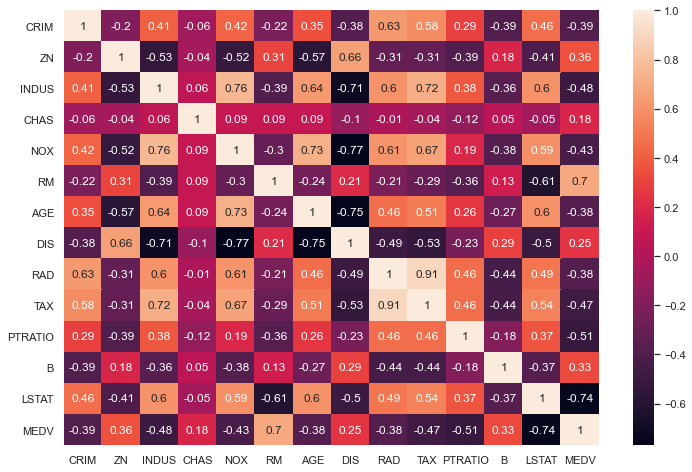

In [48]:
sns.set(rc={'figure.figsize':(12,8)})
correlation_matrix = boston_dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [36]:
x = pd.DataFrame(boston_dataset['RM'], columns = ['RM'])
y = boston_dataset['MEDV']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/4, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
regressor.score(X_train,y_train)

0.48752067939343646

In [42]:
def adj_r2(x,y):
    r2 = regressor.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [43]:
adj_r2(X_train,y_train)

0.4861613178003156

In [46]:
regressor.score(X_test,y_test)

0.4679000543136781

In [47]:
adj_r2(X_test,y_test)

0.46364325474818746

- This regression model with RM feature is not at all giving a good result.

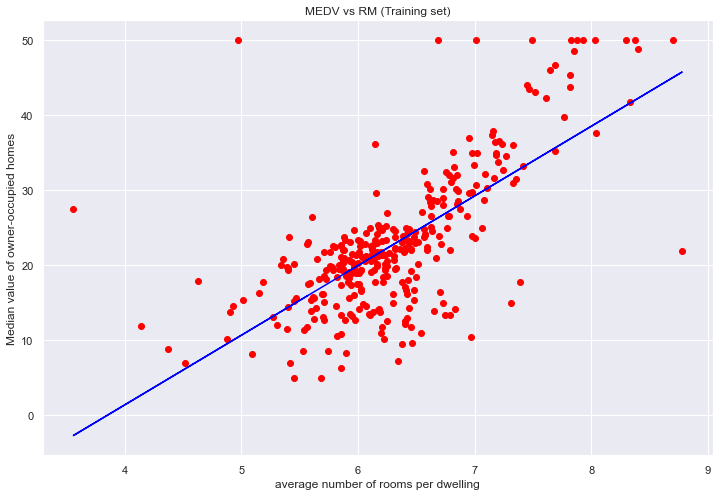

In [52]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('MEDV vs RM (Training set)')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

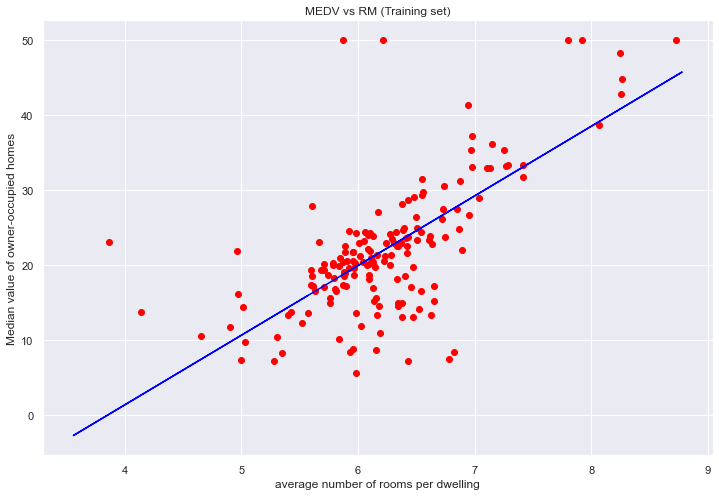

In [53]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('MEDV vs RM (Training set)')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

In [48]:
x = pd.DataFrame(boston_dataset['LSTAT'], columns = ['LSTAT'])
y = boston.target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/4, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
regressor.score(X_train,y_train)

0.5714355929370474

In [51]:
adj_r2(X_train,y_train)

0.5702988173214958

In [52]:
regressor.score(X_test,y_test)

0.4576393615560419

In [53]:
adj_r2(X_test,y_test)

0.45330047644849025

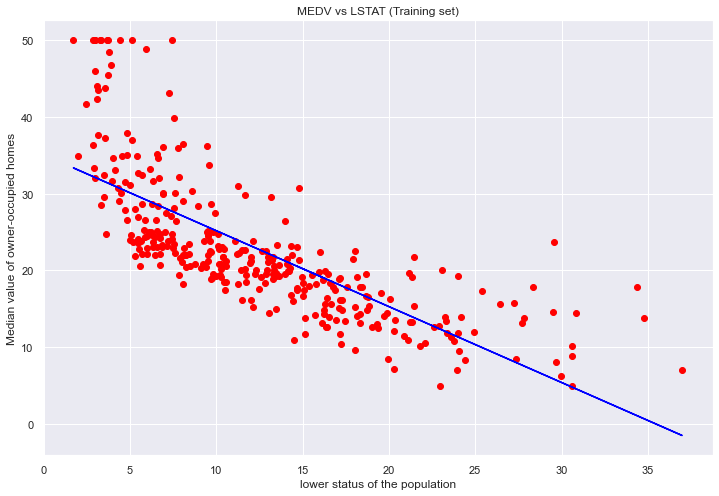

In [56]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('MEDV vs LSTAT (Training set)')
plt.xlabel('lower status of the population')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

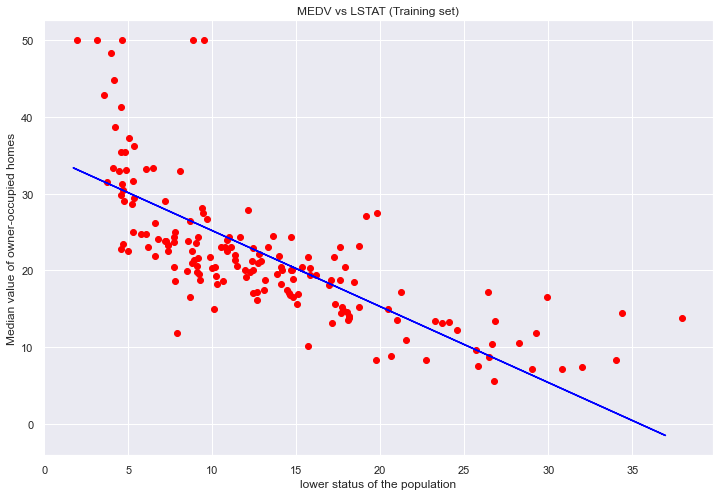

In [57]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('MEDV vs LSTAT (Training set)')
plt.xlabel('lower status of the population')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

### Linear regression with both RM and LSTAT  

- From the heatmap of correlation matrix of the all the features and from the scatter plot, we find that RM that is average number of rooms per dwelling is having a nearly positive linear relation with the price of the house (0.7) and LSTAT that is lower status of the population is having a nearly negative linear relation with the price (-0.74). Lets see how this two features together gives test result.

In [54]:
x = pd.DataFrame(boston_dataset['LSTAT'], columns = ['LSTAT'])
x['RM'] = boston_dataset['RM']
y = boston.target

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/5, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
regressor.score(X_train,y_train)

0.6618625964841895

In [57]:
def adj_r2(x,y):
    r2 = regressor.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [58]:
adj_r2(X_train,y_train)

0.6601761256437118

In [59]:
regressor.score(X_test,y_test)

0.5409084827186417

In [22]:
adj_r2(X_test,y_test)

0.5316339066119475

- There is slight improvement in the test result when both RM and LSTAT were included but the result with all the features excluding RAD and TAX has given the best result.